https://github.com/dicodingacademy/a185-pengembangan-ml/tree/main/sample_project_tfjs/starter

In [19]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, LSTM, Dropout
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import json

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df = pd.read_csv('yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

In [7]:
# change all text into lowercase
df['sentence'] = df['sentence'].str.lower()

# remove stopwords
stop_word = set(stopwords.words('english'))

df['sentence'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))

In [8]:
# split dataset
sentence = df['sentence'].values
label = df['label'].values

sentence_train, sentence_test, label_train, label_test = train_test_split(sentence, label, test_size=0.2)
print(sentence_train[0])
print(sentence_test[0])

-my order correct.
i'm sure long stood long enough begin feel awkwardly place.


In [9]:
# tokenization
filt = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ' # regex to remove symbols

tokenizer = Tokenizer(num_words=2000, oov_token='<OOV>', filters=filt)

tokenizer.fit_on_texts(sentence_train)

In [10]:
# save word_index to a json file
word_index = tokenizer.word_index

with open('word_index.json', 'w') as fp:
  json.dump(word_index, fp)

In [11]:
# create sequences and padding
train_sekuens = tokenizer.texts_to_sequences(sentence_train)
test_sekuens = tokenizer.texts_to_sequences(sentence_test)

train_padded = pad_sequences(train_sekuens, maxlen=20, padding='post', truncating='post')
test_padded = pad_sequences(test_sekuens, maxlen=20, padding='post', truncating='post')

In [12]:
# create model
model = tf.keras.Sequential([
    Embedding(input_dim=2000, output_dim=20, input_length=20),
    GlobalAveragePooling1D(),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [13]:
# compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
# train model
num_epochs=30
modelku = model.fit(
    train_padded,
    label_train,
    epochs = num_epochs,
    validation_data=(test_padded, label_test),
    verbose=2
)

Epoch 1/30
25/25 - 2s - loss: 0.6932 - accuracy: 0.4863 - val_loss: 0.6929 - val_accuracy: 0.4650 - 2s/epoch - 79ms/step
Epoch 2/30
25/25 - 0s - loss: 0.6900 - accuracy: 0.6762 - val_loss: 0.6898 - val_accuracy: 0.6250 - 115ms/epoch - 5ms/step
Epoch 3/30
25/25 - 0s - loss: 0.6796 - accuracy: 0.7638 - val_loss: 0.6812 - val_accuracy: 0.5900 - 98ms/epoch - 4ms/step
Epoch 4/30
25/25 - 0s - loss: 0.6400 - accuracy: 0.8900 - val_loss: 0.6449 - val_accuracy: 0.7400 - 97ms/epoch - 4ms/step
Epoch 5/30
25/25 - 0s - loss: 0.5467 - accuracy: 0.8813 - val_loss: 0.5824 - val_accuracy: 0.7200 - 112ms/epoch - 4ms/step
Epoch 6/30
25/25 - 0s - loss: 0.3845 - accuracy: 0.9362 - val_loss: 0.5195 - val_accuracy: 0.7400 - 95ms/epoch - 4ms/step
Epoch 7/30
25/25 - 0s - loss: 0.2464 - accuracy: 0.9513 - val_loss: 0.5101 - val_accuracy: 0.7150 - 89ms/epoch - 4ms/step
Epoch 8/30
25/25 - 0s - loss: 0.1561 - accuracy: 0.9688 - val_loss: 0.5359 - val_accuracy: 0.7150 - 88ms/epoch - 4ms/step
Epoch 9/30
25/25 - 0s -

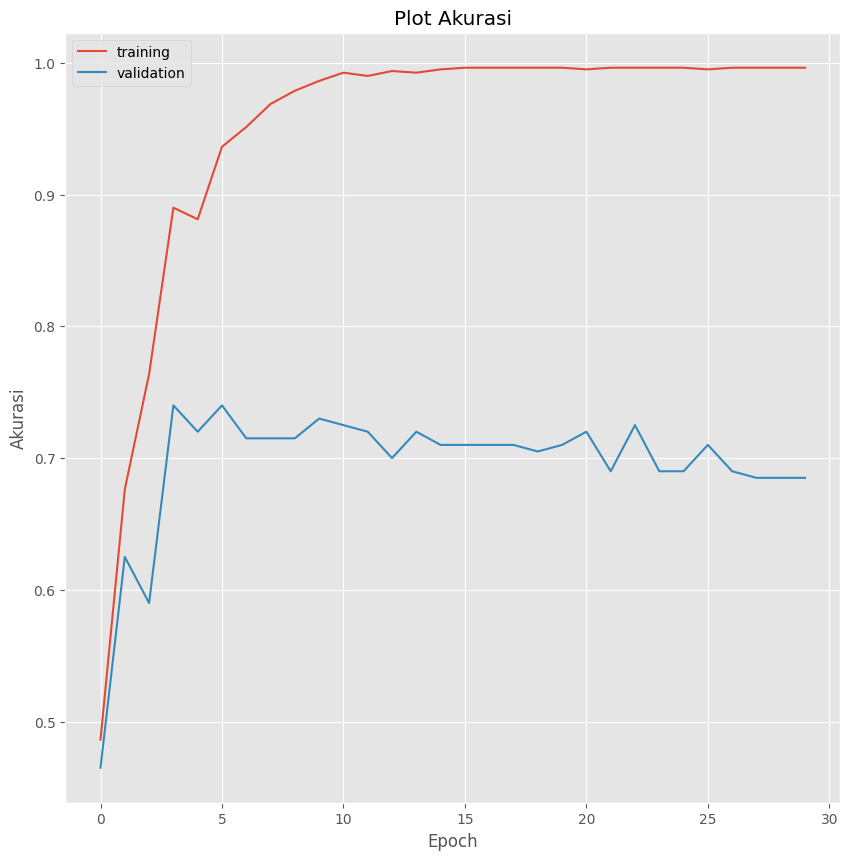

In [22]:
plt.style.use("ggplot")
plt.figure(figsize=(10,10))
plt.plot(np.arange(0, num_epochs), modelku.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), modelku.history["val_accuracy"], label="validation")
plt.title("Plot Akurasi")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.legend()
plt.savefig('images/plot_acc.png')
plt.show()

In [15]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# install tensorflow js
!pip install tensorflowjs

# convert model.h5 to model
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 32.5 MB/s eta 0:00:00
2023-12-19 15:01:14.516631: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 15:01:14.516708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 15:01:14.519711: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 15:01:15.939176: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
